In [1]:
import sys

sys.path.append("..")

from tools.tools import (
    get_ts_data_for_graph,
    load_sample,
    graph_to_label_tensor,
    score
)
from tools.display_tools import plot_current_state_of_graph,simple_sample_display
from tools.baseline_methods import cross_correlation_for_causal_discovery
import pickle
import pandas as pd
import numpy as np
from IPython.display import HTML
from hydra import initialize, compose
import matplotlib.pyplot as plt
from tools.tools import preprocessing_pipeline, predict_causal_structure

In [2]:
%load_ext autoreload
%autoreload 2

### Dataset usage tutorial

In [3]:
# To keep everything clean we use hydra for HPs.
with initialize(version_base=None, config_path="../config/"):
    cfg = compose(config_name='predict_single.yaml')

In [4]:
G = pickle.load(open("../" + cfg.full_graph_path, "rb"))

In [5]:
a = pd.read_csv("../resources/rivers_meta_east_germany.csv", index_col=0)

In [6]:
G_tr = pickle.load(open("../datasets/random_5/test.p", "rb"))

## Displaying graphs

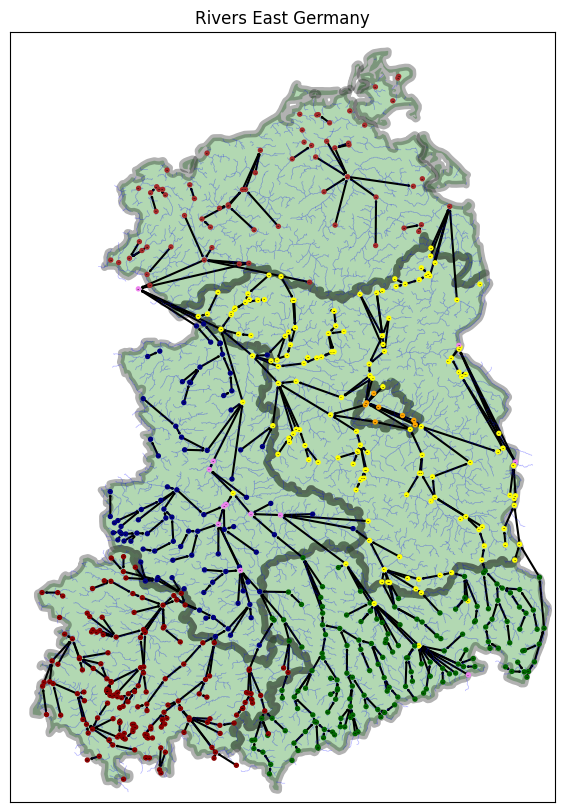

In [8]:
# Full Graph
plot_current_state_of_graph(
    G,
    dpi=50,
    node_size=8,
    save=0,
    river_map=True,
    ger_map=True,
    width=1.5,
    arrowsize=1,
    fs=(10, 10),
    font_size=1,
    ger_path = "../visualization/east_german_map.shp",
    river_path = "../visualization/river_east_german_map.shp",
)

## Scoring a sample

In [9]:
# Load the raw ts data and the labels for a specific sample:
ds  =pickle.load(open("../" + cfg.sample_path + "random_5" + "/test.p", "rb"))
example = ds[0]
data = load_sample(p= "../" + cfg.data_path, which= example)


In [11]:
label = pd.read_csv("../datasets/compose_for_wasim/0_label.csv", index_col=[0,1], header=[0,1])
data = pd.read_csv("../datasets/compose_for_wasim/0_data.csv",index_col=0)

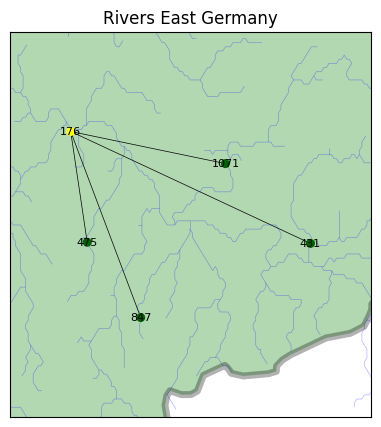

In [12]:
# Load the raw ts data and the labels for a specific sample:
ds  =pickle.load(open("../" + cfg.sample_path + "random_5" + "/test.p", "rb"))
example = ds[0]
data = load_sample(p= "../" + cfg.data_path, which= example)

In [17]:
# labels can be exported from graph like this:
label = graph_to_label_tensor(example, human_readable=True)
label

Cause          
             99   306  307
Effect 99    0.0  0.0  0.0
       306   0.0  0.0  1.0
       307   1.0  0.0  0.0

In [14]:
# Run some standard preprocessing steps
sample_data = get_ts_data_for_graph(
    data,
    resolution=cfg.resolution_value,
    interpolate=cfg.interpolation,
    normalize=cfg.normalize,
)

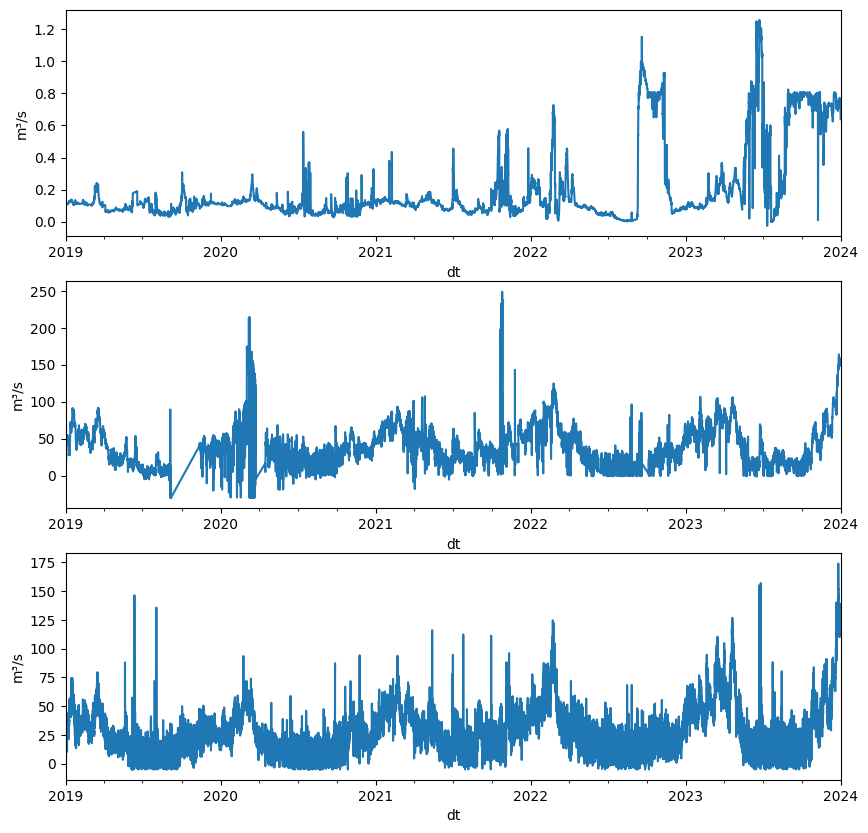

In [20]:
#TS
fix, axs = plt.subplots(3, 1, figsize=(10, 10))
for n,x in enumerate(sample_data.columns):#
    sample_data[x].plot(ax=axs[n])
    axs[n].set_ylabel("m³/s")

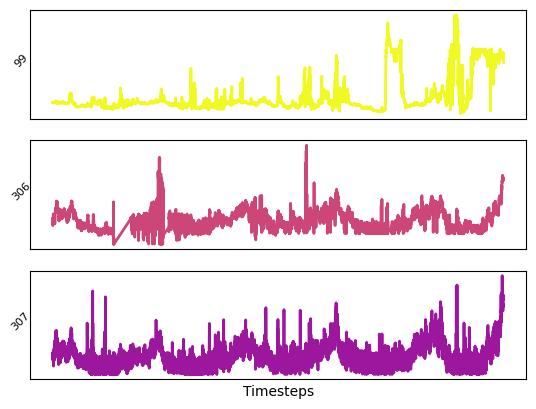

In [21]:
#Alternative quick display
simple_sample_display(sample_data)

In [15]:
res = cross_correlation_for_causal_discovery(sample_data,cfg.method_hps, human_readable=True)
res 

Cause                            
               553   1144   1145   1146   1147
Effect 553   False  False  False  False  False
       1144   True  False   True   True   True
       1145   True  False  False   True   True
       1146   True  False  False  False   True
       1147   True  False  False  False  False

In [17]:
# Score expect a set of samples so we expand here.

score(np.expand_dims(res.values,0),np.expand_dims(label.values,0),cfg)

Scoring...
(1, 5, 4) (1, 5, 4)
0
group


,cross_correlation_debug_set_3
Metric,
Max Acc thresh,1.0
Max Acc,0.8
Max individual Acc thresh,1.0
Max individual Acc,0.8
Null Acc,0.8
Max F1 thresh,True
Max F1,0.571429
Max individual F1 thresh,1.0
Max individual F1,0.571429


In [21]:
cfg

{'sample_path': 'datasets/', 'data_path': 'resources/rivers_ts_east_germany.csv', 'full_graph_path': 'resources/rivers_east_germany.p', 'save_path': 'results/', 'eval_set': 'test', 'ds_name': 'debug_set_3', 'resolution_value': '1H', 'subsample_value': 1, 'window_data_year_value': False, 'window_data_month_value': [], 'interpolation': True, 'normalize': False, 'save_full_out': True, 'subsample_strategy': 'None', 'var_test_window': 720, 'restrict_to': False, 'parallel': True, 'remove_diagonal': True, 'method_hps': {'method': 'cross_correlation', 'map_to_summary_graph': 'max', 'var_absolute_values': False, 'reverse_physical': True, 'filter_mode': 'None', 'max_lag': 50}}

### Full DS

In [22]:
# To keep everything clean we use hydra for HPs.
with initialize(version_base=None, config_path="../config/"):
    cfg = compose(config_name='predict_single.yaml')

cfg.data_path  = "../" + cfg.data_path
ds  =pickle.load(open("../" + cfg.sample_path + cfg.ds_name + "/test.p", "rb"))
Y,Y_names,X =  preprocessing_pipeline(ds,cfg)


Prep ds...


In [23]:
graph_to_label_tensor(ds[0], human_readable=True)

Cause          
             99   306  307
Effect 99    0.0  0.0  0.0
       306   0.0  0.0  1.0
       307   1.0  0.0  0.0

In [24]:
graph_to_label_tensor(ds[0])

array([[0., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [25]:
data = load_sample(p= cfg.data_path, which= example)
label = graph_to_label_tensor(example, human_readable=True)
# Run some standard preprocessing steps
sample_data = get_ts_data_for_graph(
    data,
    resolution=cfg.resolution_value,
    interpolate=cfg.interpolation,
    normalize=cfg.normalize,
)

In [26]:
res = []
for r in range(len(Y)):
    res.append(predict_causal_structure(X[[str(x) for x in Y_names[r]]], cfg,cross_correlation_for_causal_discovery, n=1, length=1))

Sample 1/1
Sample 1/1
Sample 1/1
Sample 1/1
Sample 1/1


In [27]:
score(res,Y, cfg)

Scoring...
(5, 3, 2) (5, 3, 2)
0
1
2
3
4
group


,cross_correlation_debug_set_3
Metric,
Max Acc thresh,0
Max Acc,0.733333
Max individual Acc thresh,0.2
Max individual Acc,0.766667
Null Acc,0.666667
Max F1 thresh,True
Max F1,0.636364
Max individual F1 thresh,0.6
Max individual F1,0.68


In [29]:
# Run a loop to score on multiple samples
res = []
lab = []
for example in ds: 
    data = load_sample(p= cfg.data_path, which= example)
    label = graph_to_label_tensor(example, human_readable=True)
    # Run some standard preprocessing steps
    sample_data = get_ts_data_for_graph(
        data,
        resolution=cfg.resolution_value,
        interpolate=cfg.interpolation,
        normalize=cfg.normalize,
    )

    res.append(cross_correlation_for_causal_discovery(sample_data,cfg.method_hps, human_readable=True))
    lab.append(label)

In [30]:
res_stack = [res[w].values for w in range(5)]
lab_stack = [lab[w].values for w in range(5)]
score(np.array(res_stack), np.array(lab_stack), cfg)

Scoring...
(5, 3, 2) (5, 3, 2)
0
1
2
3
4
group


,cross_correlation_debug_set_3
Metric,
Max Acc thresh,0
Max Acc,0.733333
Max individual Acc thresh,0.2
Max individual Acc,0.766667
Null Acc,0.666667
Max F1 thresh,True
Max F1,0.636364
Max individual F1 thresh,0.6
Max individual F1,0.68
